In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [144]:
df = pd.read_csv("E:/Userfiles/Download/archive (5)/50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [146]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [147]:
startup =df.rename({'R&D Spend':'RnD_Spend', 'Marketing Spend':'Marketing_Spend'}, axis = 1)
startup  

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


<AxesSubplot:>

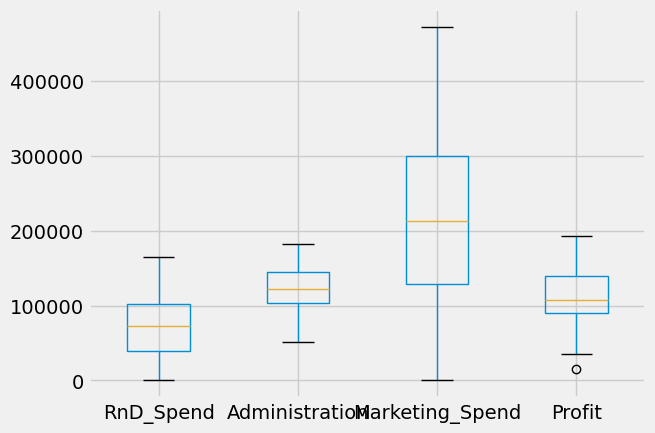

In [148]:
startup.boxplot()

In [149]:
startup.corr()

,RnD_Spend,Administration,Marketing_Spend,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [150]:
startup.cov()

,RnD_Spend,Administration,Marketing_Spend,Profit
RnD_Spend,2.107017e+09,3.111739e+08,4.065495e+09,1.800007e+09
Administration,3.111739e+08,7.849973e+08,-1.101690e+08,2.266673e+08
Marketing_Spend,4.065495e+09,-1.101690e+08,1.495492e+10,3.685779e+09
Profit,1.800007e+09,2.266673e+08,3.685779e+09,1.624588e+09


In [151]:
startup.nunique()

RnD_Spend          49
Administration     50
Marketing_Spend    48
State               3
Profit             50
dtype: int64

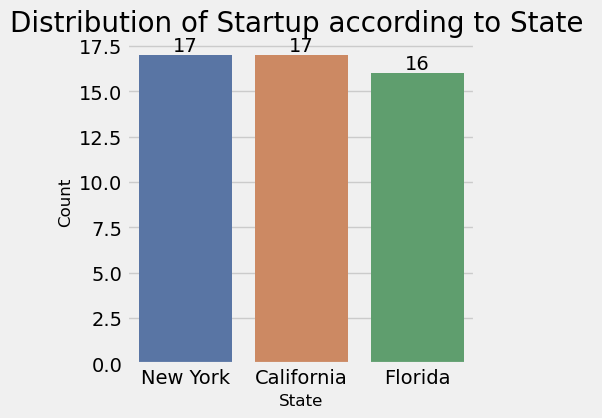

In [152]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(x = startup.State,palette='deep',ax=ax)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('State', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title("Distribution of Startup according to State ",fontsize= 20)
plt.show()

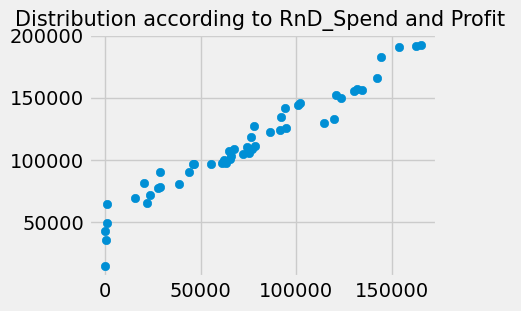

In [153]:
fig, ax = plt.subplots(figsize=(4, 3))
plt.scatter( startup['RnD_Spend'], startup['Profit'])
plt.title("Distribution according to RnD_Spend and Profit ",fontsize= 15)
plt.show()

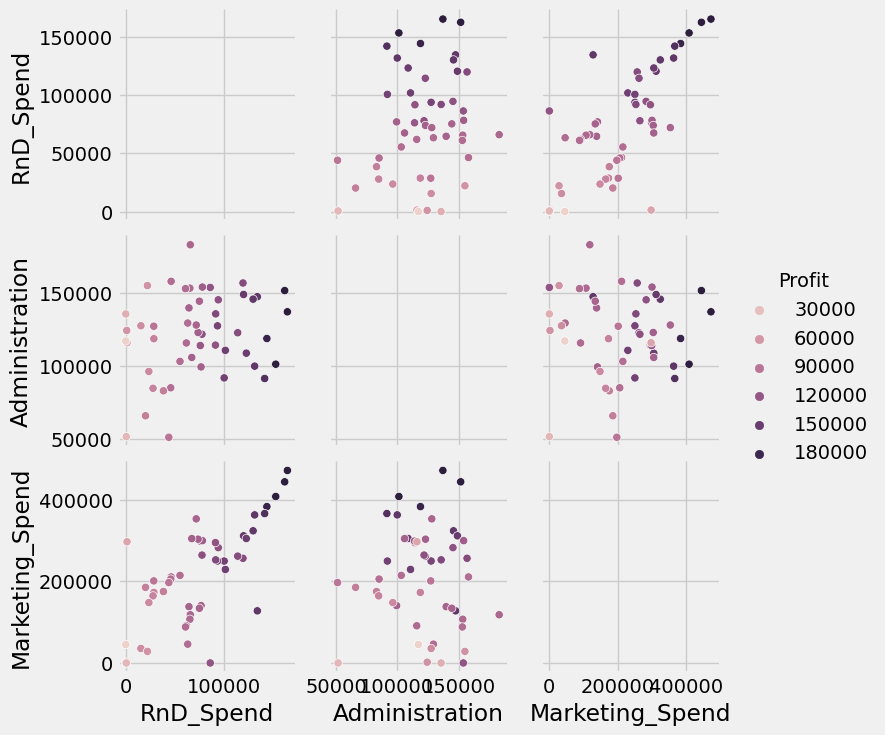

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data=startup, hue = 'Profit')
plt.show();

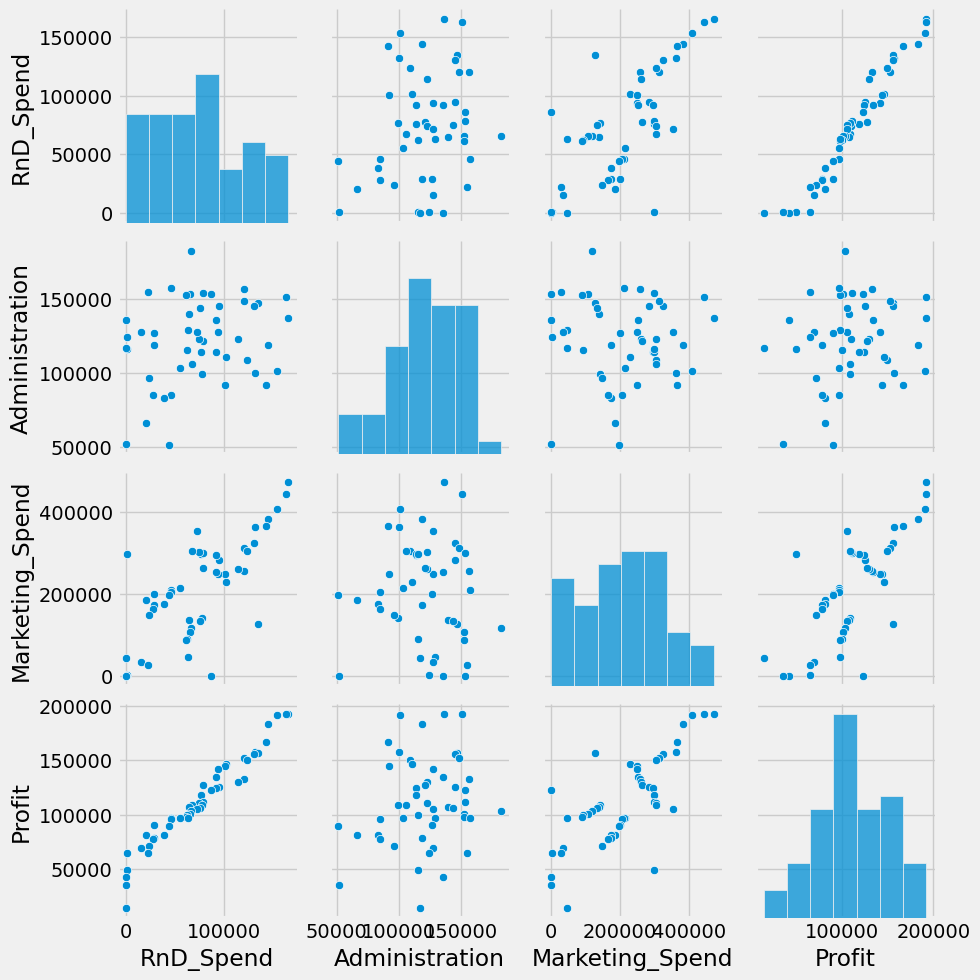

In [155]:
sns.pairplot(data=startup)
plt.show();

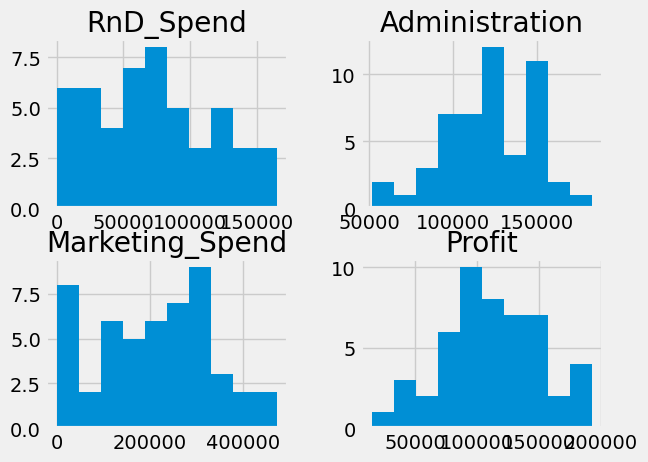

In [156]:
startup.hist()
plt.show();

In [157]:
Model = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend',data = startup).fit()
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        13:03:15   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
rsq_RnD_Spend = smf.ols('RnD_Spend~Administration+Marketing_Spend',data=startup).fit().rsquared  
vif_RnD_Spend = 1/(1-rsq_RnD_Spend) 

rsq_Administration = smf.ols('Administration~RnD_Spend+Marketing_Spend',data=startup).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) 

rsq_Marketing_Spend = smf.ols('Marketing_Spend~RnD_Spend+Administration',data=startup).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend) 



# Storing vif values in a data frame
d1 = {'Variables':['RnD_Spend','Administration','Marketing_Spend'],'VIF':[vif_RnD_Spend,vif_Administration,vif_Marketing_Spend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RnD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


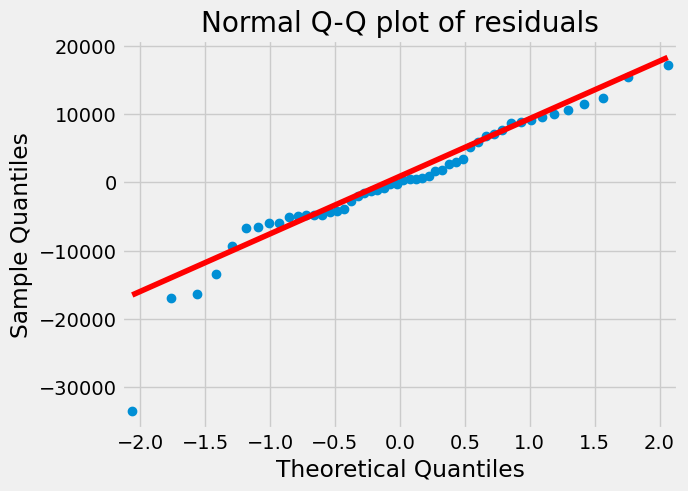

In [159]:
import statsmodels.api as sm
sm.qqplot(Model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [160]:
(b,_)=Model.get_influence().cooks_distance
b

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

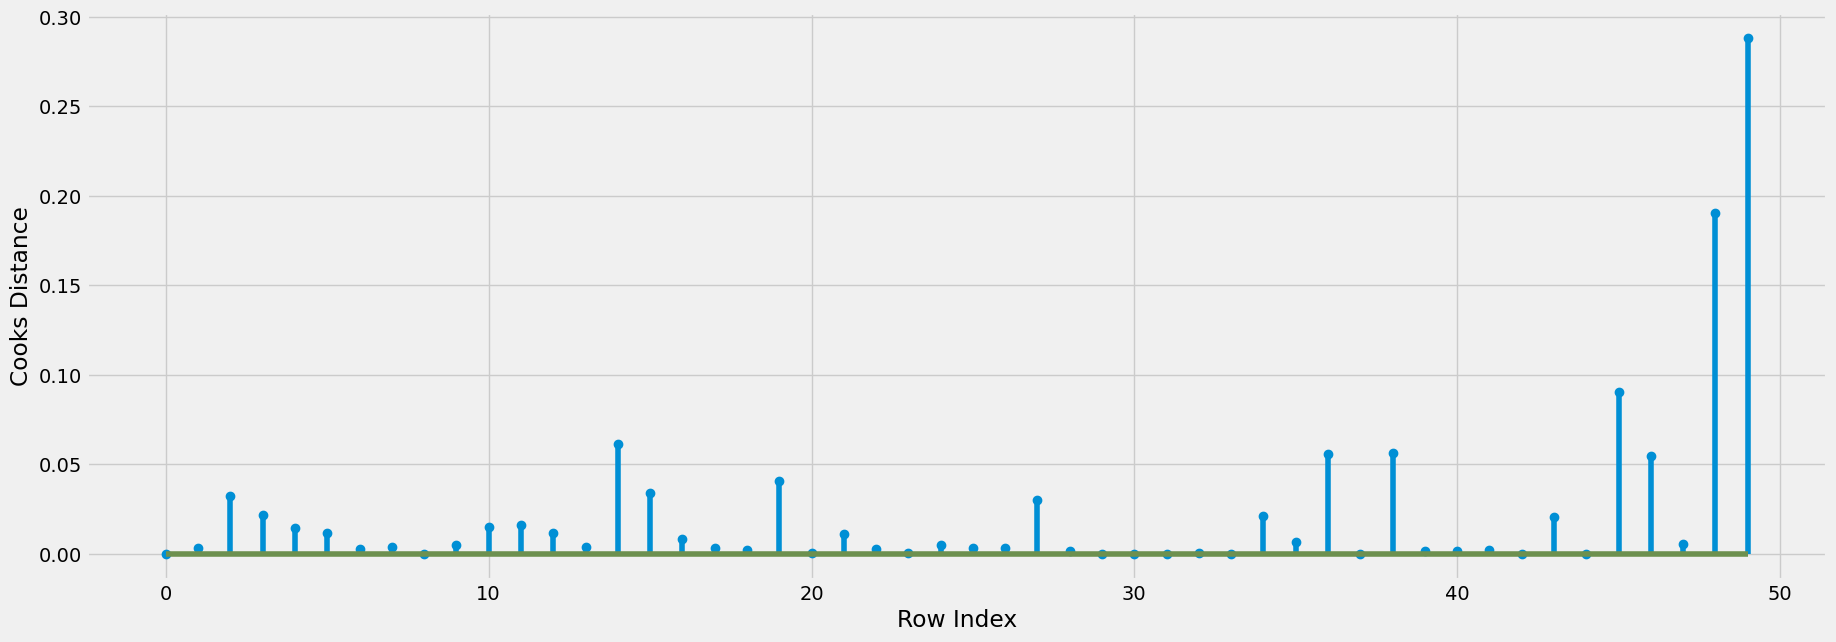

In [161]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(b,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [162]:
np.argmax(b) , np.max(b)

(49, 0.2880822927543263)

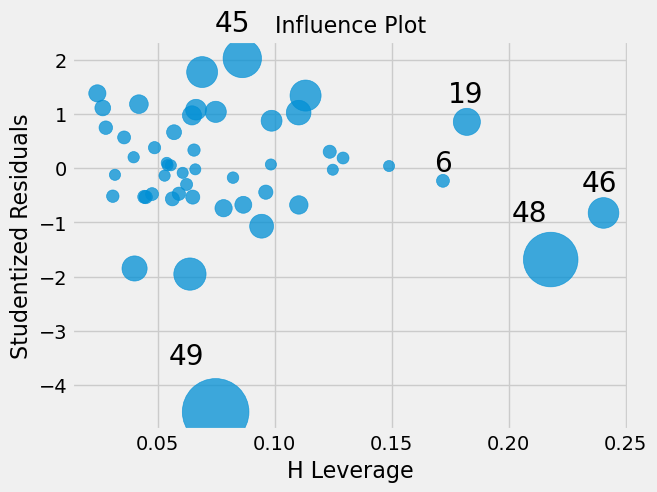

In [163]:
influence_plot(Model)
plt.show()

In [ ]:
##To drop
#data2=startup.drop(startup.index[[49]],axis=0).reset_index(drop=True)
#data2

In [166]:
Startup = startup.drop(['State'], axis=1)

In [236]:
Startup

,RnD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [ ]:
#Splitting X and Y


In [167]:
X = Startup.drop(['Profit'], axis=1)
y = Startup['Profit']

In [168]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [169]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()

In [170]:
reg.fit(Xtrain, ytrain)

LinearRegression()

In [174]:
predict = reg.predict(Xtest)

In [175]:
print('Coefficients: ', reg.coef_)

Coefficients:  [0.79045925 0.03114407 0.03137206]


In [176]:
print('Variance score: {}'.format(reg.score(Xtest, ytest)))

Variance score: 0.9355188337118217


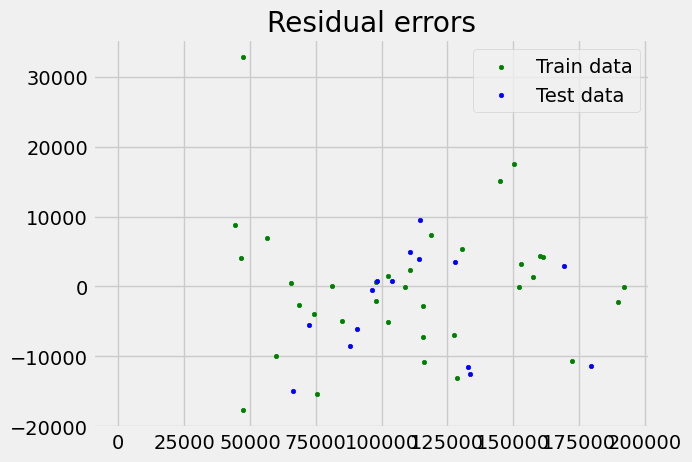

In [177]:
##plot for residual error
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(Xtrain), reg.predict(Xtrain) - ytrain,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(Xtest), reg.predict(Xtest) - ytest,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

In [178]:
from sklearn.metrics import r2_score
r2_score(ytest,predict)

0.9355188337118217

In [180]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(ytest,predict))

MSE 62240269.84291537


In [181]:
print("RMSE",np.sqrt(mean_squared_error(ytest,predict)))

RMSE 7889.250271281509


#### DECISION TREE MODEL

In [182]:
from sklearn import tree

In [183]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(Xtrain, ytrain)

DecisionTreeRegressor()

In [184]:
y_pred = regressor.predict(Xtest)

In [185]:
df = pd.DataFrame({'Real Values':ytest, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
28,103282.38,101004.64
11,144259.40,141585.52
10,146121.95,141585.52
41,77798.83,90708.19
2,191050.39,182901.99
27,105008.31,118474.03
38,81229.06,71498.49
31,97483.56,99937.59
22,110352.25,118474.03
4,166187.94,182901.99


In [186]:
from sklearn.metrics import r2_score
r2_score(ytest,y_pred)

0.8830655850465238

In [187]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, y_pred)
rmse = mse**.5
print(mse)
print(rmse)

112870625.01476668
10624.058782535358


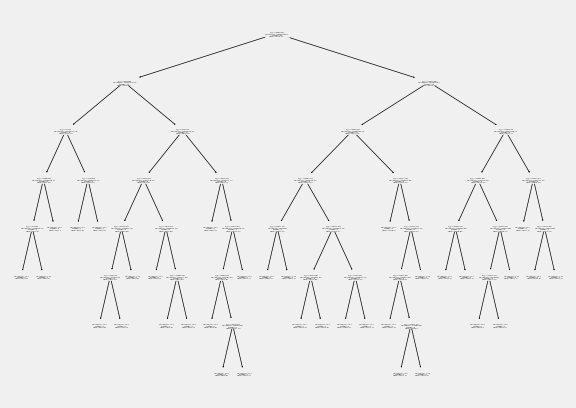

<Figure size 5000x2000 with 0 Axes>

In [188]:
tree.plot_tree(regressor)
plt.figure(figsize=(50,20))
plt.show()

#### RANDOM FOREST MODEL

In [189]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [190]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

-13.123010943086204


In [191]:
results

array([ -9.17893629, -27.98403447,  -7.6401821 , -28.8435812 ,
        -8.2104967 , -16.32580226, -24.96254936,  -1.17814219,
        -3.11277046,  -3.7936144 ])

In [192]:
forest_new = RandomForestRegressor()  # n_estimators is the number of decision trees
forest_new.fit(Xtrain, ytrain)

RandomForestRegressor()

In [193]:
ypred = forest_new.predict(Xtest)
ypred

array([103611.2914, 136284.6764, 136965.7839,  79659.6402, 183778.6314,
       120616.5276,  72524.1388,  99964.3164, 115037.5957, 168097.5191,
       102604.1797,  89603.7392, 115944.3959,  90191.6769, 127240.7958])

In [194]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.945308201532678

In [195]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, ypred)
rmse = mse**.5
print(mse)
print(rmse)

52791109.26107025
7265.749050240467


In [ ]:
##Hyperparameter tuning
#grid = { 
#    'n_estimators': [200,300,400,500],
#    'max_features': ['sqrt','log2'],
#    'max_depth' : [3,4,5,6,7],
#    'random_state' : [18] }
## show start time
#print(datetime.now())## Grid Search function
#CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid1, cv= 5)
#CV_frf.fit(x_train, y_train)## show end time
#print(datetime.now())

#### SVM MODEL

In [196]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score


In [197]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [198]:
Xtrain_norm = norm_func(Xtrain)

In [199]:
ytrain_norm = norm_func(ytrain)

In [200]:
Xtest_norm = norm_func(Xtest)

In [201]:
ytest_norm = norm_func(ytest)

In [202]:
clf = SVR()
clf.fit(Xtrain_norm , ytrain_norm)

SVR()

In [203]:
y_preds = clf.predict(Xtest_norm)

In [204]:
y_preds

array([0.48529516, 0.54710634, 0.57996925, 0.21299372, 0.64755493,
       0.55413781, 0.29096185, 0.37436655, 0.54024467, 0.61236025,
       0.35855596, 0.329159  , 0.44058161, 0.3556282 , 0.59623732])

In [205]:
from sklearn.metrics import r2_score
r2_score(ytest_norm,y_preds)

0.371494735660554

In [206]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(ytest_norm,y_preds))

MSE 0.04729977953823647


In [207]:
print("RMSE",np.sqrt(mean_squared_error(ytest_norm,y_preds)))

RMSE 0.21748512486659052


In [208]:
n=50  #no of records
k=4   #no of independent variables
r2= r2_score(ytest_norm,y_preds)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.31562760105260323


In [209]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': np.arange(0.001,10),
              'gamma': [0.01,0.1,0.5,0.9,1,5],
              'kernel': ['rbf', 'linear']}

grid = RandomizedSearchCV(SVR(),param_distributions = param_grid, cv=5, random_state=123, n_jobs=-1)

grid.fit(Xtrain_norm,ytrain_norm)
print(grid.best_params_)

{'kernel': 'linear', 'gamma': 0.9, 'C': 2.001}


In [210]:
grid.best_params_ , grid.best_score_ 

({'kernel': 'linear', 'gamma': 0.9, 'C': 2.001}, 0.8719105422866921)

In [211]:
clf1 = SVR(C= 2.001, gamma = 0.9, kernel='linear')
clf1.fit(Xtrain_norm , ytrain_norm)

y_pred2 = clf1.predict(Xtest_norm)
r2_score(ytest_norm,y_pred2)

0.5808362242062615

#### KNN MODEL

In [212]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [213]:
num_folds = 10
kfold = KFold(n_splits=10)

In [214]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(Xtrain,ytrain)

KNeighborsRegressor(n_neighbors=3)

In [215]:
preds1 = model.predict(Xtest) 
pd.Series(preds1).value_counts() 

112840.346667    2
102782.190000    1
132831.830000    1
135269.970000    1
76914.720000     1
177228.390000    1
80817.796667     1
99456.690000     1
163217.690000    1
83317.953333     1
87221.030000     1
105653.673333    1
101085.150000    1
117526.130000    1
dtype: int64

In [216]:
from sklearn.metrics import r2_score
r2_score(ytest,preds1)

0.941132222984733

In [217]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(ytest,preds1))

MSE 56821961.161619335


In [218]:
print("RMSE",np.sqrt(mean_squared_error(ytest,preds1)))

RMSE 7538.034303558145


In [219]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(Xtrain, ytrain)  #fit the model
    pred=model.predict(Xtest) #make prediction on test set
    error = sqrt(mean_squared_error(ytest,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 7455.287766996884
RMSE value for k=  2 is: 9016.871233362677
RMSE value for k=  3 is: 7538.034303558145
RMSE value for k=  4 is: 9914.935159324
RMSE value for k=  5 is: 11710.758706071456
RMSE value for k=  6 is: 12977.013803219315
RMSE value for k=  7 is: 14273.483170757925
RMSE value for k=  8 is: 15375.02813042676
RMSE value for k=  9 is: 17304.453085600242
RMSE value for k=  10 is: 18813.8038305668
RMSE value for k=  11 is: 19258.78909386604
RMSE value for k=  12 is: 19334.90059098178
RMSE value for k=  13 is: 20016.39682647132
RMSE value for k=  14 is: 20747.449528204892
RMSE value for k=  15 is: 21832.203291209476
RMSE value for k=  16 is: 21737.189076388226
RMSE value for k=  17 is: 23269.339156640843
RMSE value for k=  18 is: 23122.10612092826
RMSE value for k=  19 is: 23206.09409008536
RMSE value for k=  20 is: 24054.21483798085


<AxesSubplot:>

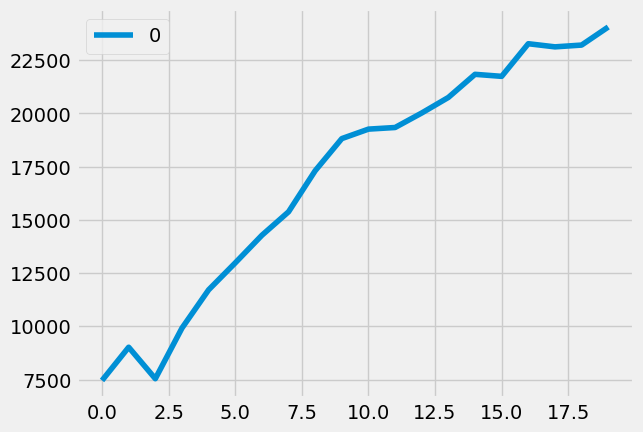

In [220]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

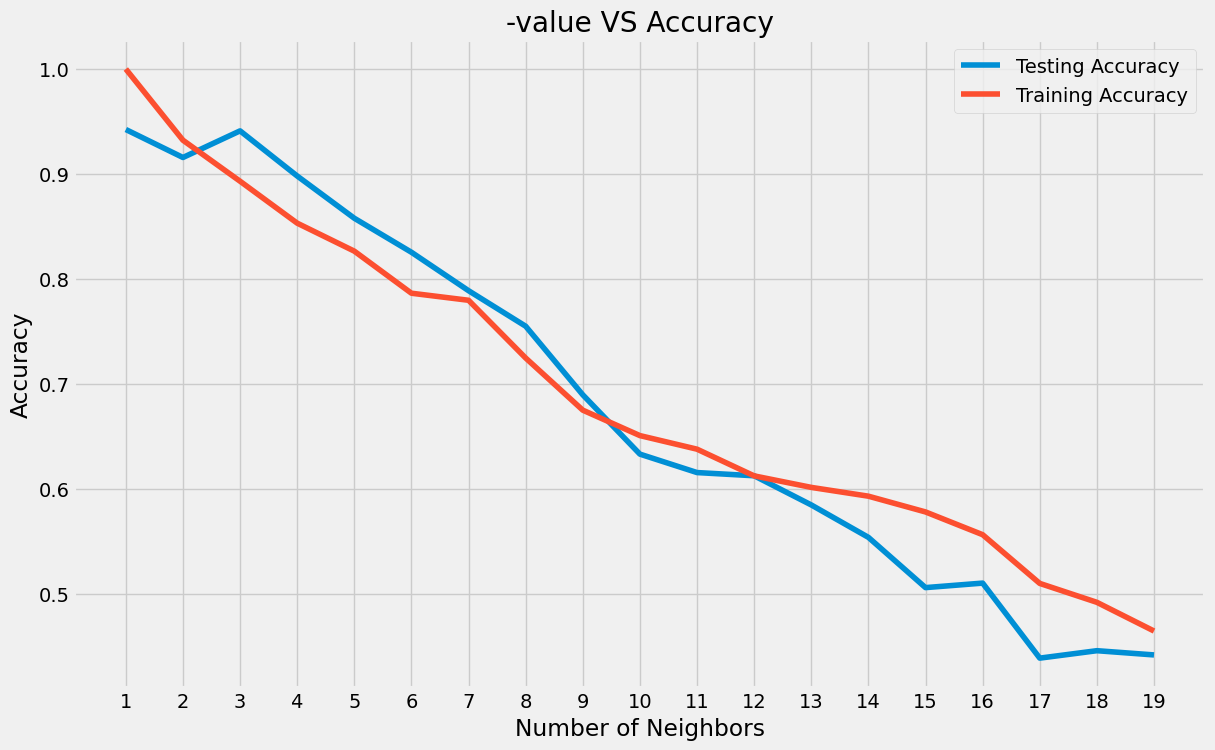

Best accuracy is 0.9424175366127705 with K = 1


In [221]:
k_values = np.arange(1,20)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsRegressor(n_neighbors=k)
    # Fit with knn
    knn.fit(Xtrain,ytrain)
    #train accuracy
    train_accuracy.append(knn.score(Xtrain,ytrain))
    # test accuracy
    test_accuracy.append(knn.score(Xtest,ytest))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [222]:
model1 = KNeighborsRegressor(n_neighbors=1)
model1.fit(Xtrain,ytrain)

KNeighborsRegressor(n_neighbors=1)

In [223]:
preds2 = model.predict(Xtest) 
pd.Series(preds2).value_counts() 

121243.0065    2
107842.3855    2
93512.4675     1
117468.1240    1
118525.0805    1
98789.6220     1
131106.1035    1
130967.8110    1
103328.9320    1
88666.0055     1
131106.1035    1
100983.6755    1
110774.2220    1
dtype: int64

In [224]:
from sklearn.metrics import r2_score
r2_score(ytest,preds2)

0.40056266578655897

In [225]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(ytest,preds2))

MSE 578605251.471738


In [226]:
print("RMSE",np.sqrt(mean_squared_error(ytest,preds2)))

RMSE 24054.21483798085


#### XGBOOST MODEL

In [227]:
from numpy import loadtxt
from pandas import read_csv
from xgboost import XGBRegressor

In [228]:
model = XGBRegressor(n_estimators=90,max_depth=3)
model.fit(Xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=90, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [229]:
y_pred_tr = model.predict(Xtest)

from sklearn.metrics import r2_score
r2_score(ytest,y_pred_tr)

0.8867853547118847

In [230]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(ytest,y_pred_tr))

MSE 109280127.49350832


In [231]:
print("RMSE",np.sqrt(mean_squared_error(ytest,y_pred_tr)))

RMSE 10453.713574300204


#### LGBM MODEL

In [232]:
import lightgbm as lgb

In [233]:
lgb_train = lgb.Dataset(Xtrain, ytrain)
lgb_eval = lgb.Dataset(Xtest, ytest, reference=lgb_train)

In [234]:
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

[1]	valid_0's l2: 1.1837e+10	valid_0's l1: 104268
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l2: 1.1837e+10	valid_0's l1: 104268
[3]	valid_0's l2: 1.1837e+10	valid_0's l1: 104268
[4]	valid_0's l2: 1.1837e+10	valid_0's l1: 104268
[5]	valid_0's l2: 1.1837e+10	valid_0's l1: 104268
[6]	valid_0's l2: 1.1837e+10	valid_0's l1: 104268
[7]	valid_0's l2: 1.1837e+10	valid_0's l1: 104268
[8]	valid_0's l2: 1.1837e+10	valid_0's l1: 104268
[9]	valid_0's l2: 1.1837e+10	valid_0's l1: 104268
[10]	valid_0's l2: 1.1837e+10	valid_0's l1: 104268
[11]	valid_0's l2: 1.1837e+10	valid_0's l1: 104268
[12]	valid_0's l2: 1.1837e+10	valid_0's l1: 104268
[13]	valid_0's l2: 1.1837e+10	valid_0's l1: 104268
[14]	valid_0's l2: 1.1837e+10	valid_0's l1: 104268
[15]	valid_0's l2: 1.1837e+10	valid_0's l1: 104268
[16]	valid_0's l2: 1.1837e+10	valid_0's l1: 104268
[17]	valid_0's l2: 1.1837e+10	valid_0's l1: 104268
[18]	valid_0's l2: 1.1837e+10	valid_0's l1: 104268
[19]	valid_0's l2: 1.1837e+10	

In [235]:
y_predict = model.predict(Xtest)

# accuracy check
mse = mean_squared_error(ytest, y_predict)
rmse = mse**(0.5)
r2 = r2_score(ytest, y_predict)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 
print(r2)
 
 

MSE: 1000741808.89
RMSE: 31634.50
-0.03677248112167808


## ADABOOST

In [243]:
from sklearn.ensemble import AdaBoostRegressor

In [244]:
RegModel = AdaBoostRegressor(n_estimators=50 ,learning_rate=1)

In [245]:
print(RegModel)

AdaBoostRegressor(learning_rate=1)


In [246]:
AB=RegModel.fit(Xtrain,ytrain)
prediction=AB.predict(Xtest)

In [247]:
from sklearn import metrics
print('R2 Value:',metrics.r2_score(ytest,prediction))

R2 Value: 0.9347930005815122


In [248]:
mse = mean_squared_error(ytest,prediction)
rmse = mse**(0.5)

In [249]:
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

MSE: 62940878.29
RMSE: 7933.53


In [88]:
#Model_Accuracy = pd.DataFrame({'Logistic': 99.9, 'DT': 90.14, 'RF': 96.21, 'SVM': 94.17, 'NB': 85.5, 'Guassian NB': 86.92, 'KNN': 90.27, 'XGBM': 95.30, 'LGBM': 94.76}, index=[0] )